# Lab 1.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy import stats



# These are some parameters to make figures nice (and big)
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Exercise 1: Unfair dice
Consider a pair of unfair dice. The probabilities for the two dice are as follows:

|Roll|Probability Dice 1|Probability Dice 2
|---|---|---|
|1|1/8|1/10|
|2|1/8|1/10|
|3|1/8|1/10|
|4|1/8|1/10|
|5|1/8|3/10|
|6|3/8|3/10|

## Question 1.1: 
Compute the probability of rolling a total of 11. 

*Hint*: Use the law of total probability to compute the probability of rolling an eleven, conditional on the roll of the first dice:

$P(S=11)=\sum_{n=1}^{6}P(S=11|D_{1}=n)$


### Answer


## Question 1.2: 
Simulate a random variable that has the same distribution as the roll from Dice 1. Plot its histogram to check that you have simulated the correct distribution. 

The easiest way to do this is by first drawing from a *discrete uniform random variable*  using <code>stats.randint</code>. Hint: Look at how we drew a Bernoulli Random Variable using a discrete uniform random variable:
[https://cdds-uiuc.github.io/simles-book/content/Module01/M01_N02_Random_Variables.html#bernoulli-random-variable]

*Hints*: 
- Start with a discrete uniform random variable that takes values between 1 and 8 and between 1 and 10 respecrively. 
- Make sure your histogram has the correct number of bins (i.e. 6), otherwise the normalization will not work out correctly

(array([0.    , 0.4995, 0.5005, 0.    ]),
 array([-1.5, -0.5,  0.5,  1.5,  2.5]),
 <BarContainer object of 4 artists>)

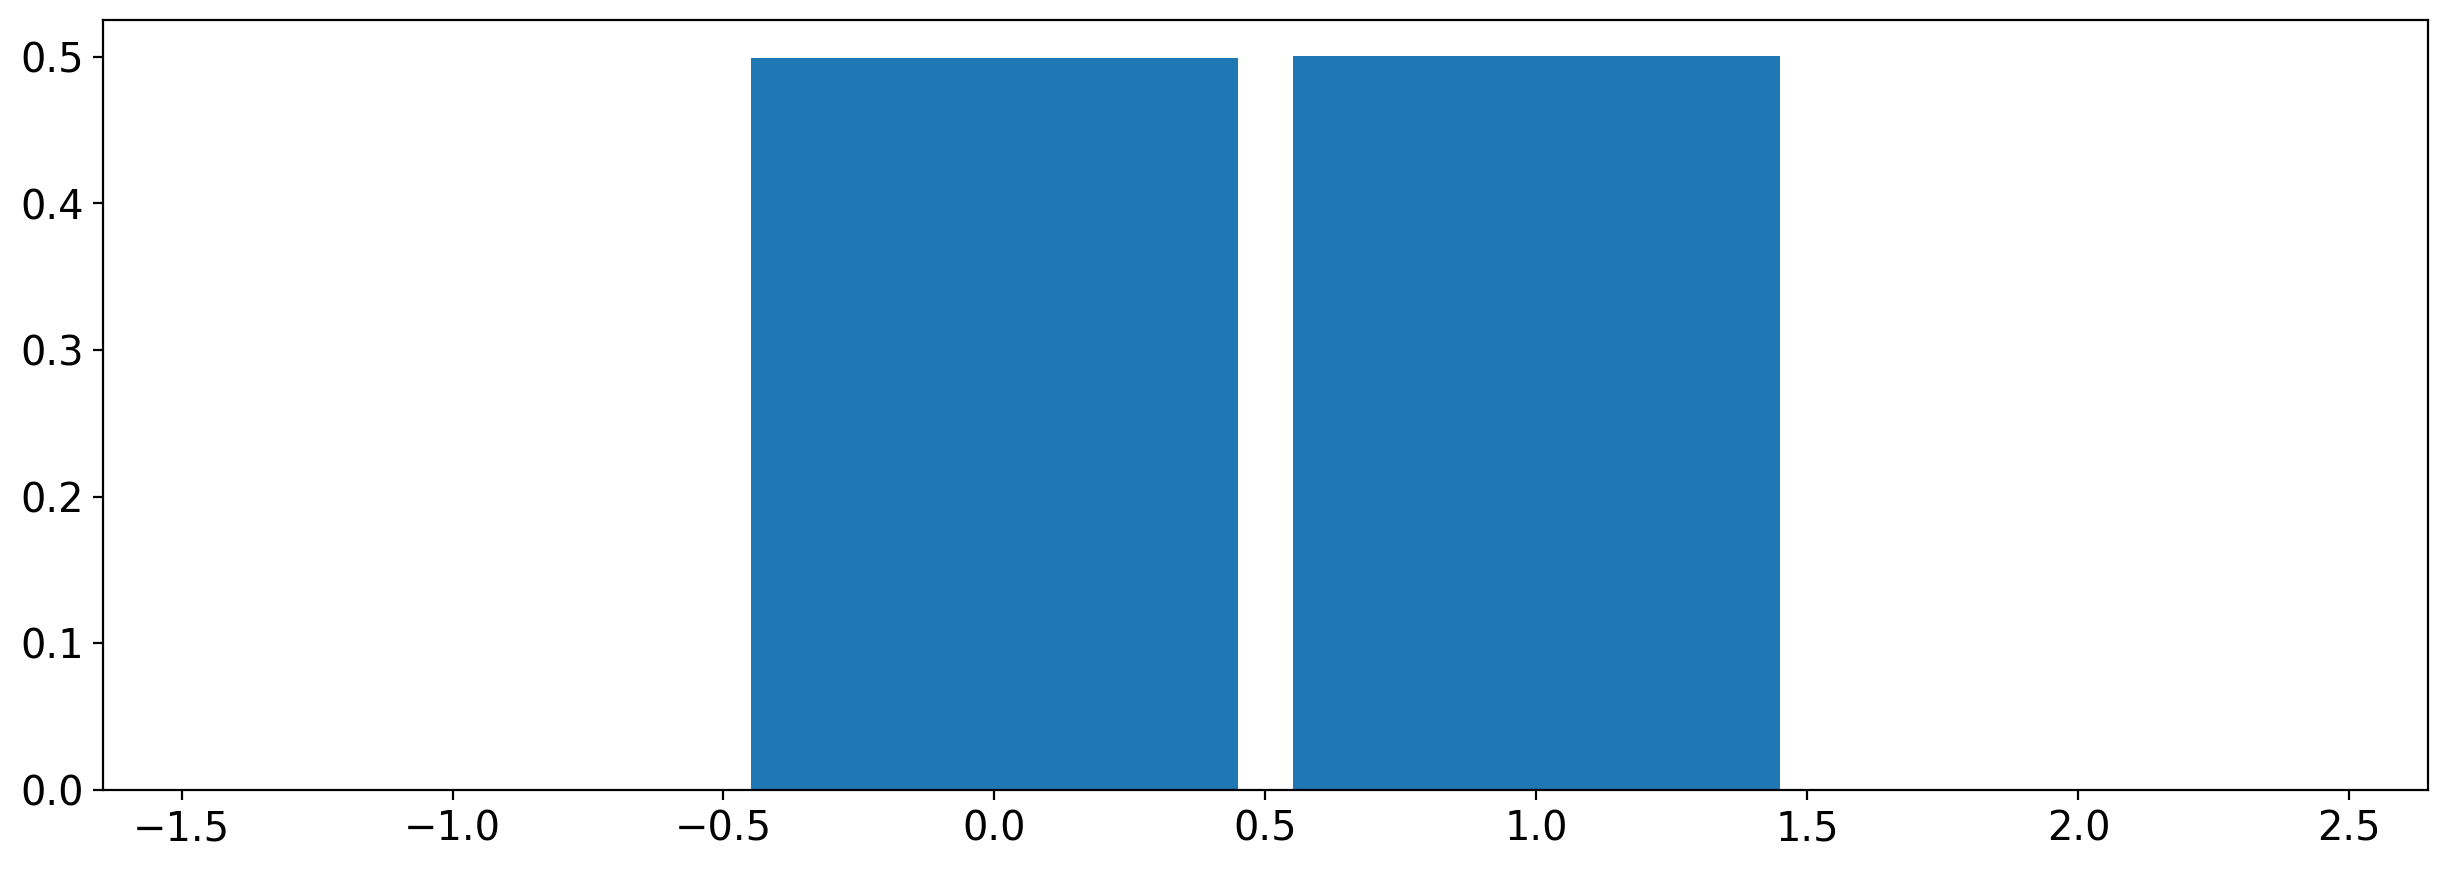

In [2]:
# Hint: Here is how to generate a ten thousand realizations of a random variable without using the size option. 
# This using the exapmle of the Bernoulli random variable
Ndraws=10000
Z=np.zeros(Ndraws)

for j in range(Ndraws):
    X=stats.randint.rvs(low=1, high=7, size=1)
    if X>3: 
        Y=1
    else: 
        Y=0
    Z[j]=Y;

bin_edges_bernoulli=np.arange(-1.5,3.5,1)
fig, ax = plt.subplots(1, 1)
ax.hist(Z,bins=bin_edges_bernoulli,density=True,rwidth=0.9)


### Answer 

## Question 1.3: 
Do the same for Dice 2. i.e., Simulate a random variable that has the same distribution as the roll from Dice 2. Plot its histogram to check that you have simulated the correct distribution. 

### Answer

## Question 1.4 
Now generate a random variable that is the sum of the two dice. Plot it's histogram and confirm that probability of rolling 11 is the same you calculated by hand above. 

### Answer:


# Exercise 2: Precip in Urbana
## Question 2.1 
Plot the histograms of precipitation in urbana on hourly, daily, monthly, and annual time scales. What do you observe?

For convenience, I've downloaded 4-times daily hourly data from ERA5 for the gridcell representing Urbana. The cell below downloades a netcdf dataset. 

In [3]:
#convert from m/hr to inches/hr, taking into account we only sample 4hrs of the day 
from urllib.request import urlretrieve
url='https://github.com/cdds-uiuc/simles-book/raw/5faf634/content/Module01/data/ERA5precip_urbana_1950-2021.nc'
fname='./data/ERA5precip_urbana_1950-2021.nc'
urlretrieve(url, fname);



We'll use xarray since it makes it very easy to compute daily-, monthly-, and annual-total precipitation. 

https://docs.xarray.dev/en/stable/generated/xarray.Dataset.resample.html

https://earth-env-data-science.github.io/lectures/xarray/xarray-part2.html

The cell below computes hourly, daily, monthly, and annual values of precipitation. All you have to do is plot their histograms

In [6]:
fname='ERA5precip_urbana_1950-2021.nc'
ds=xr.open_dataset(fname);

unit_conv=1000/24.5*6

pr_hr =ds.tp*unit_conv;
pr_day =pr_hr.resample(time='1D').sum('time')
pr_mon=pr_hr.resample(time='1M').sum('time')
pr_yr =pr_hr.resample(time='1Y').sum('time')



### Answer 

## Question 2.2
Before we apply a stats/ML technique on a real dataset (such as the dataset above of precipitation in Urbana), we want to test the technique on a *synthetic dataset*. That is a datset that we generated, where we know what went in. This allows us to check whether the stats/ML technique gives the correct output. I.e. whether the estimated parameters are the parameters we put in when we generated the synthetic data. 

For this question you will **model daily precipitation a mixed random variable**. In particular, the random variable you build should have a 60% of no rain. If it does rain, the amount of precipitation should be distributed according to a gamma distribtuion with shape parameter a=1.5, and scale parameter scale=1. 

Draw at least 20,000 samples from this distribution and plot the histogram. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html




### Answer


# Exercise 3: Compute $\pi$

We can use our skills in generating samples from random variables to do neat mathematical calculations like computing an approximate value for $\pi$. This approach falls in the class of methods known as Monte Carlo Methods. 

More info: https://en.m.wikipedia.org/wiki/Monte_Carlo_method#Overview


General idea: 
If we inscribe a circle in a square, the area of the square will be $(2r^2)=4r^2$, while the area of the circle will be $\pi r^2$. This, $\pi$ is equal to:
$$\pi=4\frac{A_{circle}}{A_{square}}$$

We can get an approximate value for pi by drawing a random variable that is uniformly distributed within the square. The number of points (draws) that fall within the circle will be proportional to the area of the circle. Thus, we can approximate $\pi$ by counting how many number of points fall in the circle relative to the total number of points.

To do simulate a point that that is uniformly distributed within the square, you will draw a random variable X that represents draws for the x coordinate, and a random varible that Y represents draws for the y coordinate. The points that fall within the circle are the points for which the radius is less than 1: 
$$ r=\sqrt{x^2+y^2}<1$$ 

*Hint*: 

![circle.png](M01_fig_Circle.png)

## Question 3.1 

Estimate the value of $\pi$ using 1000 points and reproduce the figure above. 

*Hints*:
-  To count the number of elements of an array (i.e. an array that contains draws from the random variable $R=\sqrt{X^2+Y^2}$, use the following code snippet:
<code>ratio=np.sum(R<1)/len(R)</code>
- To select only the ponts for which a condition is satisfied, i.e. only the values of the X coordinate for which the radius is less than one use: <code>X_in_circle=X[R<1]</code>

## Question 3.2 
Redo the estimate for  $\pi$ using 100; 1000; 10,000;  1000,000;  1,000,000 ; and 10,000,000 points. What do you notice? 

*Note*: don't plot the points for all these cases. Plotting ten million points can take a while. 



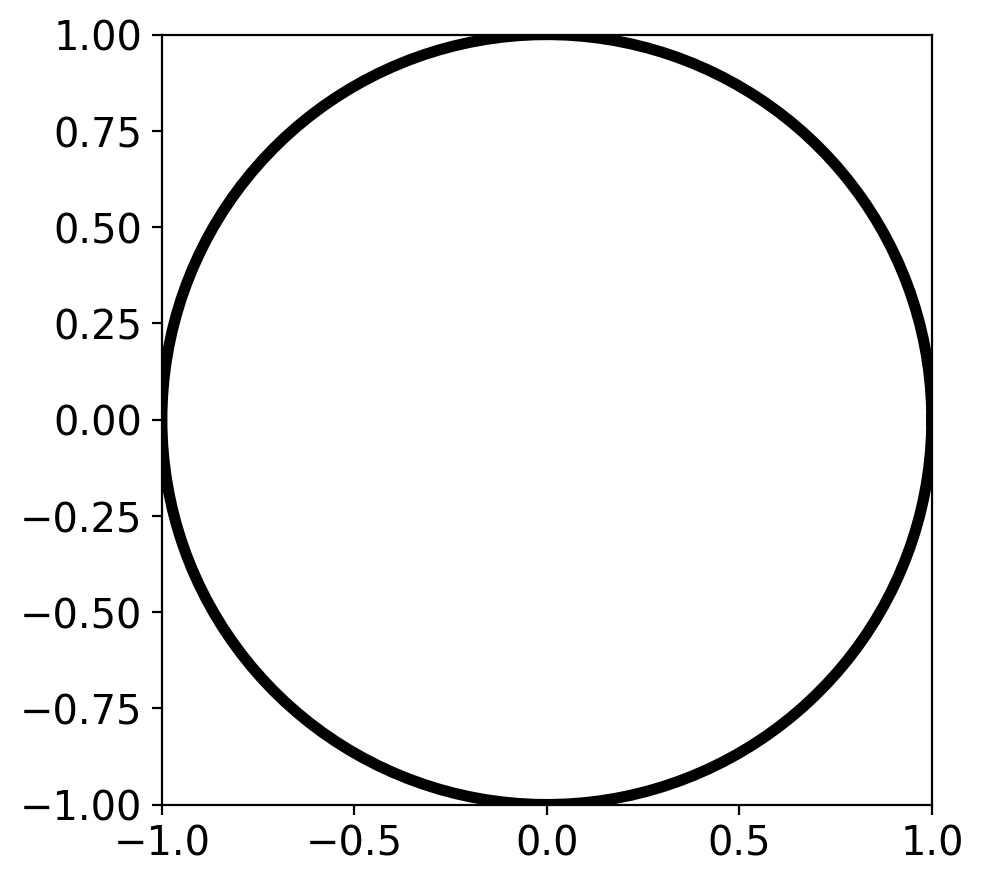

In [7]:
# Below I give you a snippet of code for plotting a circle
figure, axes = plt.subplots(1) 
axes.set_aspect( 1 )
plt.xlim(-1,1)
plt.ylim(-1,1)

# create a circle using polar coordinates representation:
theta = np.linspace( 0 , 2 * np.pi , 150 )
radius = 1
x_coord = radius * np.cos( theta )
y_coord = radius * np.sin( theta )


# plot the circle:
# note you may want to plot your scatter plot of points before you plot the circle
plt.plot(x_coord,y_coord,'k',linewidth=4)




### Answer